In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)


In [2]:
# Load dataset
ipl = pd.read_csv("/content/matches.csv")

# View first 5 rows
ipl.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Dataset shape  Column information # Check missing values


In [3]:

ipl.shape


ipl.info()


ipl.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


# Countings wins per team

---# Display top 10 teams




---



---



In [4]:

team_wins = ipl['winner'].value_counts()


team_wins.head(10)


,count
winner,
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


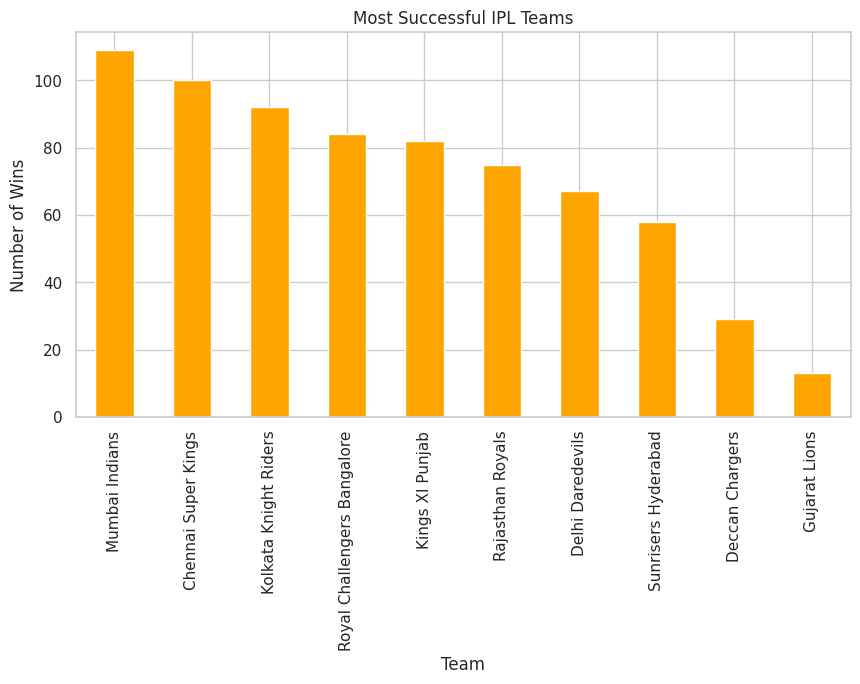

In [5]:
team_wins.head(10).plot(kind='bar', color='orange')
plt.title("Most Successful IPL Teams")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.show()


In [6]:
# Teams winning toss AND match
toss_win_match_win = ipl[ipl['toss_winner'] == ipl['winner']]

# Percentage calculation
percentage = (len(toss_win_match_win) / len(ipl)) * 100
percentage


51.98412698412699

# Matches won batting first


# Matches won while chasing

# Pie chart

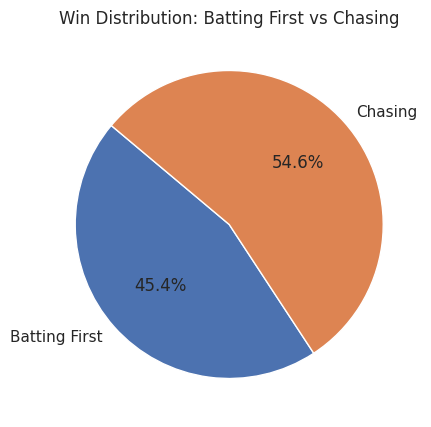

In [7]:

bat_first = ipl[ipl['win_by_runs'] > 0].shape[0]


chasing = ipl[ipl['win_by_wickets'] > 0].shape[0]


plt.pie([bat_first, chasing], labels=['Batting First', 'Chasing'],
        autopct='%1.1f%%', startangle=140)
plt.title("Win Distribution: Batting First vs Chasing")
plt.show()


**Count player of match awards**

In [8]:

top_players = ipl['player_of_match'].value_counts().head(10)

top_players


,count
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


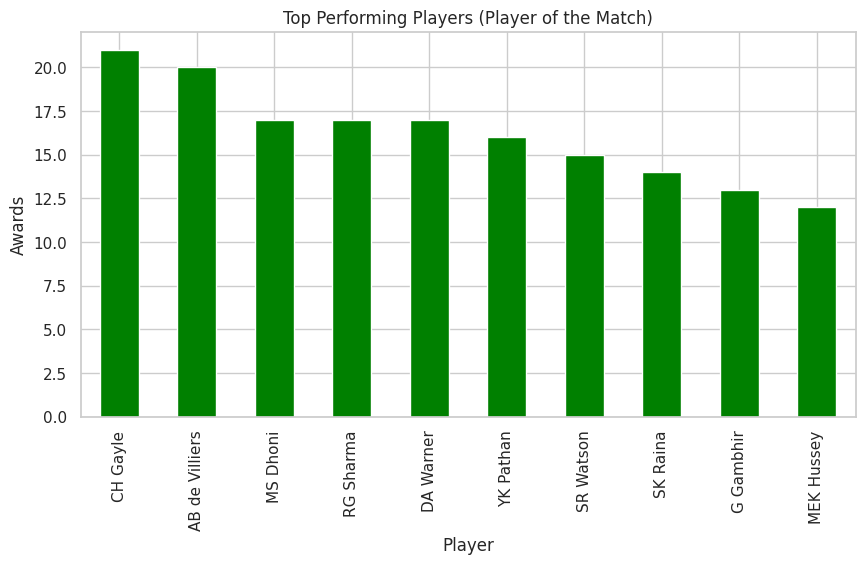

In [9]:
top_players.plot(kind='bar', color='green')
plt.title("Top Performing Players (Player of the Match)")
plt.xlabel("Player")
plt.ylabel("Awards")
plt.show()


In [10]:
venue_wins = ipl['venue'].value_counts().head(10)

venue_wins


,count
venue,
Eden Gardens,77
Wankhede Stadium,73
M Chinnaswamy Stadium,73
Feroz Shah Kotla,67
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,47
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21


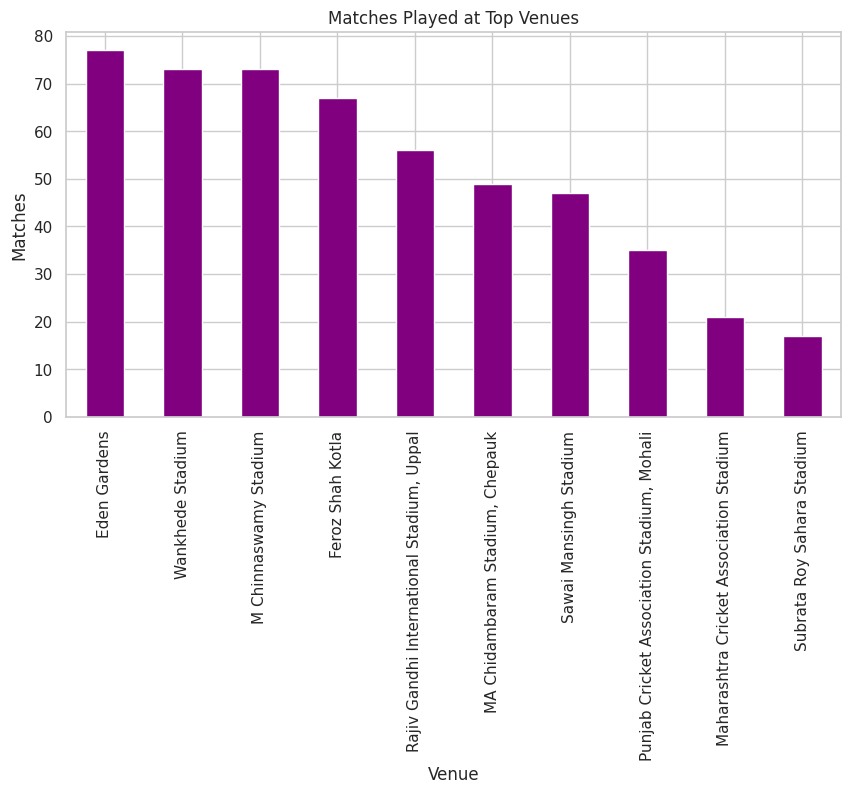

In [11]:
venue_wins.plot(kind='bar', color='purple')
plt.title("Matches Played at Top Venues")
plt.xlabel("Venue")
plt.ylabel("Matches")
plt.show()


In [12]:
print("Recommended Teams for Endorsements:")
print(team_wins.head(5))

print("\nRecommended Players for Endorsements:")
print(top_players.head(5))


Recommended Teams for Endorsements:
winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: count, dtype: int64

Recommended Players for Endorsements:
player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: count, dtype: int64
